# Проект: Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста. #
## Описание проекта: ##

В крупном интернет магазине был подготовлен список гипотез для увеличения выручки.<br>
Необходимо приоритизировать гипотезы, запустить A/B-тесты и проанализировать результат. 

### Часть 1. Приоритизация гипотез ###

В файле <b>hypothesis.csv</b> - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:<br>
- Reach,
- Impact,
- Confidence,
- Effort.

<b>Задача</b>

- Применить фреймворк <b>ICE</b> для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк <b>RICE</b> для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении <b>RICE</b> вместо <b>ICE</b>. Объяснить, почему так произошло.

### Часть 2. Анализ A/B-теста ###

Проведен A/B-тест и получены результаты, которые описаны в файлах <b>orders.csv</b> и <b>visitors.csv</b>.

<b>Задача</b>

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.    Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: <br>
    <b>1.</b> Остановить тест, зафиксировать победу одной из групп.<br> 
    <b>2.</b> Остановить тест, зафиксировать отсутствие различий между группами.<br>
    <b>3.</b> Продолжить тест.
    
### Описание данных: ###

<b>Файл hypothesis.csv:</b>

- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b>Файл orders.csv</b>

- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

<b>Файл visitors.csv</b>

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста


## Часть 1. Приоритизация гипотез. ##

### Загрузка и предобработка данных. ###

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# загрузка датасетов
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# выведем первые 5 строки датасета hypothesis
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
# выведем основую информацию о датасете hypothesis
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# проверим датасет hypothesis на наличие дубликатов
hypothesis.duplicated().sum()

0

***Вывод:***<br><br>Выявлено нарушение стиля в наименовании столбцов.Формат данных соотвествует ячейкам. Пропуски и дубликаты отсутствуют.

In [6]:
# выведем первые 5 строки датасета orders
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
# выведем основую информацию о датасете orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# проверим датасет orders на наличие дубликатов
orders.duplicated().sum()

0

***Вывод:***<br><br>Выявлено нарушение стиля в наименовании столбцов. Формат данных в столбце *date* не соотвествует формату *datetime*.<br> Пропуски и дубликаты отсутствуют.

In [9]:
# выведем первые 5 строки датасета visitors
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
# выведем основую информацию о датасете visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
# проверим датасет visitors на наличие дубликатов
visitors.duplicated().sum()

0

***Вывод:***<br><br>Нарушения стиля в наименовании столбцов не выявлено. Формат данных в столбце *date* не соотвествует формату *datetime*.<br> Пропуски и дубликаты отсутствуют.

***Вывод по подразделу:*** 
- Исправить нарушения стиля в наименовании столбцов датасетов **hypothesis** и **orders**. 
- Изменить формат данных для столбцов *date* датасетов **orders** и **visitors**.
- Пропуски и дубликаты отсутствуют.


In [12]:
# приведем наименования столбцов датасета hypothesis к единому стилю
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [13]:
# проверим внесенные изменения
hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [14]:
# приведем наименования столбцов датасета orders к единому стилю
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [15]:
# проверерим внесенные изменения
orders.columns.to_list()

['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [16]:
# изменим формат данных столбца date на корректный
orders['date'] = pd.to_datetime(orders['date'])

In [17]:
# проверим внесенные изменения
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
# изменим формат данных стоблца date на корректный
visitors['date'] = pd.to_datetime(visitors['date'])

In [19]:
# проверим внесенные изменения
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
# определим пользователей попавших в обе группы
duplicated_users = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(),
                                  orders.query('group == "B"')['visitor_id'].unique())

In [21]:
# выведем общее количество пользователей
orders['visitor_id'].nunique()

1031

In [22]:
# удалим пользователей поваших в обе группы
orders = orders[~orders['visitor_id'].isin(duplicated_users)]

In [23]:
# вывыдем 'очищенное' количество пользователей
orders['visitor_id'].nunique()

973

***Вывод по подразделу:*** 
- В результате проведенной предобработки, данные готовы к работе.

### Применение фреймфорка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета. ###

*Формула ICE выглядит так: (impact * confidence) / efforts*

In [24]:
# зададим параметры полного отображения названия гипотез
pd.set_option("max_colwidth", 400)

In [25]:
# подсчитаем ICE для гипотез
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [26]:
# выведем результат 
hypothesis.sort_values(by='ICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


***Вывод:***<br><br>В первой тройке лидеров находятся 9, 1 и 8 гипотезы. Наибольший приоритет имеет 9 гипотеза.

### Применение фреймфорка RICE для приоритизации гипотез. ###

*Формула RICE выглядит так: (reach * impact * confidence) / efforts*

In [27]:
# зададим параметры полного отображения названия гипотез
pd.set_option("max_colwidth", 400)

In [28]:
# подсчитаем RICE для гипотез
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [29]:
# выведем результат
hypothesis.sort_values(by='RICE', ascending=False).round(2)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


***Вывод:***<br><br>В первой тройке лидеров находятся 8, 3 и 1 гипотезы. Наибольший приоритет имеет 8 гипотеза. 

***Вывод по подразделу:*** 
- При расчете ICE, наибольший приоритет получила 9 гипотеза.
- При расчете RICE, наибольший приоритет получила 8 гипотеза.
- 9 гипотеза откатилась на 5 место по приоритету, по причине того, что при расчете ICE, мы не учитывали параметр *reach*(охват пользователей). Метод RICE расставил все на свои места, 8 гипотеза имеет наибольший показатель reach, который играет немало важную роль. 

## Часть 2. Анализ A/B-теста. ##

### Построим график кумулятивной выручки по группам. ###

In [30]:
# создаем массив уникальных пар значений дат и групп
datesGroups = orders[['date', 'group']].drop_duplicates()

In [31]:
# получаем агрегированные кумулятивные данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
# получаем агрегированные кумулятивные данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max',
            'visitors': 'sum'
          }
         ),
    axis=1,
).sort_values(by=['date', 'group'])

In [33]:
# обьединяем кумулятивные данные в один массив
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [34]:
# корректируем названия столбцов
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [35]:
# датасет с датой и выручкой в группе А
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue']]

In [36]:
# датасет с датой и выручкой в группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue']]

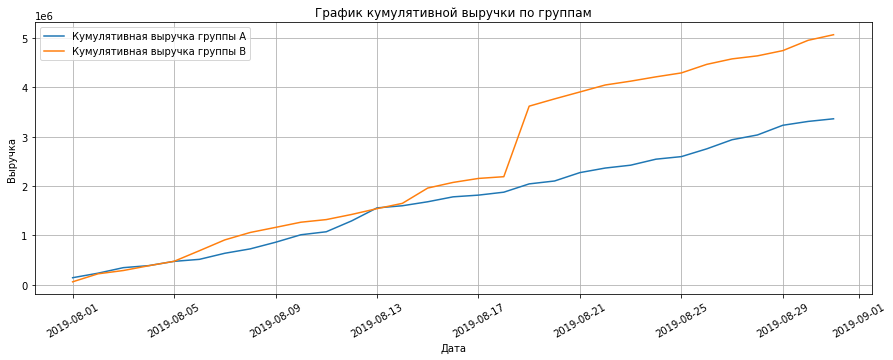

In [37]:
plt.figure(figsize=(15,5))
# строим график для группы A
plt.plot(cumulativeDataA['date'], cumulativeDataA['revenue'], label = 'Кумулятивная выручка группы A');
# строим график для группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['revenue'], label = 'Кумулятивная выручка группы B');
plt.legend()
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам');

***Вывод:***<br><br>На графике можно заметить, что показатель группы <b>B</b>, на протяжении всего периода анализа, находится выше, чем показатель группы <b>А</b>.<br>Так же наблюдается резкий скачок показателя группы <b>B</b> в промежутке с *2019-08-18 - 2019-08-19*. <br>Данный скачок обусловлен объемной выручкой в заданный период. Далее показатели группы <b>A</b> и <b>B</b> продолжают стабильный, паралельный рост.

**Построим график кумулятивного среднего чека по группам.**

In [38]:
# подсчитаем средний чек
cumulativeData['avg_check'] = (cumulativeData['revenue'] / cumulativeData['orders'])

In [39]:
# датасет с датой и средним чеком группы A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'avg_check']]

In [40]:
# датасет с датой и средним чеком группы B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'avg_check']]

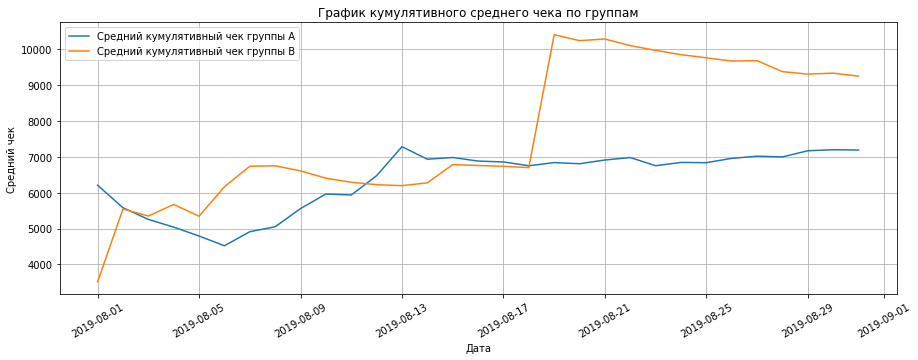

In [41]:
plt.figure(figsize=(15,5))
# строим график для группы A
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_check'], label = 'Средний кумулятивный чек группы A');
# строим график для группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_check'], label = 'Средний кумулятивный чек группы B');
plt.legend()
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам');


***Вывод:***<br><br>Происходит снижение показателя группы <b>B</b> по отношению к группе <b>A</b> на период с *2019-08-11 - 2019-08-15*.<br>Далее наблюдается аналогичная ситуация, что и в графике кумулятивной выручки.<br>Показатель группы <b>B</b> испытывает резкий прирост в промежутке с *2019-08-18 - 2019-08-19*. Далее оба показателя идут параллельно.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. ###

In [42]:
# объединим таблицы с предыдущего шага методом merge, тем самым собрав данные в одном датасете
mergedCumulativeAvg = cumulativeDataA[['date', 'avg_check']].merge(cumulativeDataB[['date', 'avg_check']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

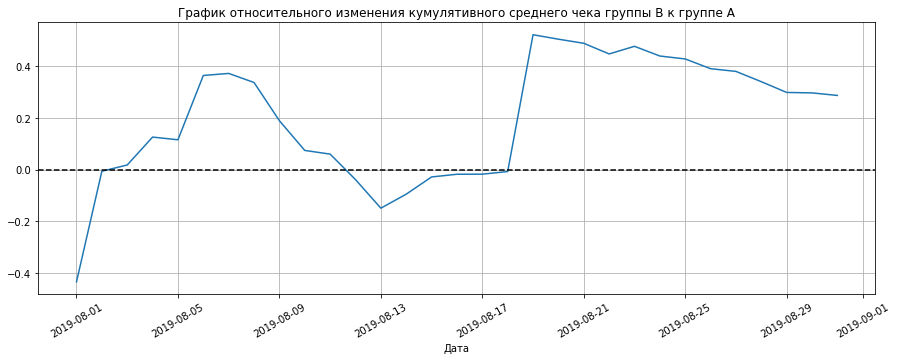

In [43]:
# строим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeAvg['date'], mergedCumulativeAvg['avg_checkB'] / mergedCumulativeAvg['avg_checkA'] - 1)
plt.grid()
plt.xticks(rotation=30)
# добавляем ось X со значением y=0
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

***Вывод:***<br><br>Показатель группы <b>B</b> испытывает рост до *2019-08-05*, далее резкий спад до *2019-08-13* и последующий рост до *2019-08-20*<br> с плавным падением не ниже нулевого уровня.<br> Возможно в данные временные отрезки были совершены крупные заказы, что и отражается в динамике на графике.<br>Средний чек группы <b>B</b> выше, чем у группы <b>А</b>.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. ###

In [44]:
# подсчитаем конверсию
cumulativeData['conversion'] = (cumulativeData['orders']/cumulativeData['visitors'])

In [45]:
# датасет с датой и конверсией группы A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'][['date', 'conversion']]

In [46]:
# датасет с датой и конверсией группы B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'][['date', 'conversion']]

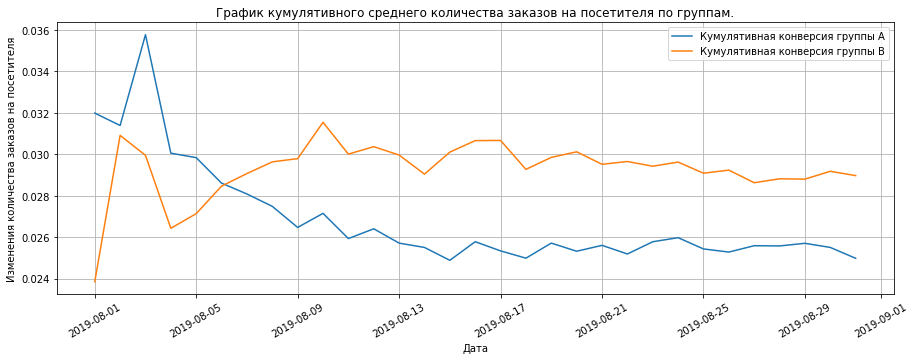

In [47]:
plt.figure(figsize=(15,5))
# строим график для группы A
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'Кумулятивная конверсия группы A');
# строим график для группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'Кумулятивная конверсия группы B');
plt.legend()
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('Дата')
plt.ylabel('Изменения количества заказов на посетителя')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам.');

***Вывод:***<br><br>В первых числах показатель группы <b>A</b> имел стремительный, пиковый рост и столь же стремительное падение.<br> Далее на протяжении всего отрезка анализа, показатель группы <b>А</b> стабильно ниже, чем показатель группы <b>B</b>.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. ###

In [48]:
# объединим таблицы с предыдущего шага методом merge, тем самым собрав данные в одном датасете
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

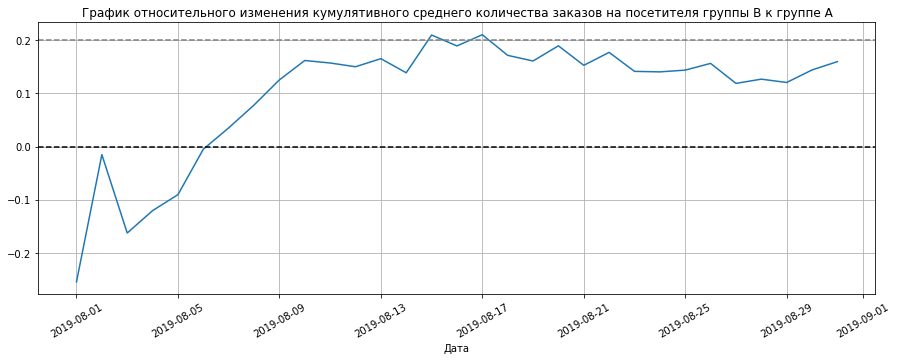

In [49]:
# строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.grid()
plt.xticks(rotation=30)
# добавляем оси Х со значением y=0 и y=0.2(серый пунктир)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');

***Вывод:***<br><br>Показатель группы <b>B</b> лидирует по отношению к показателю группы <b>A</b> на протяжении всего периода анализа.<br> Тенденция стабильно сохраняется на уровне *14- 16 %*. На *2019-08-14* по *2019-08-17*  приходился пик, который доходил до *20 %*.

### Построить точечный график количества заказов по пользователям. ###

In [50]:
# создадим датасет с пользователями и количеством заказов
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))

In [51]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

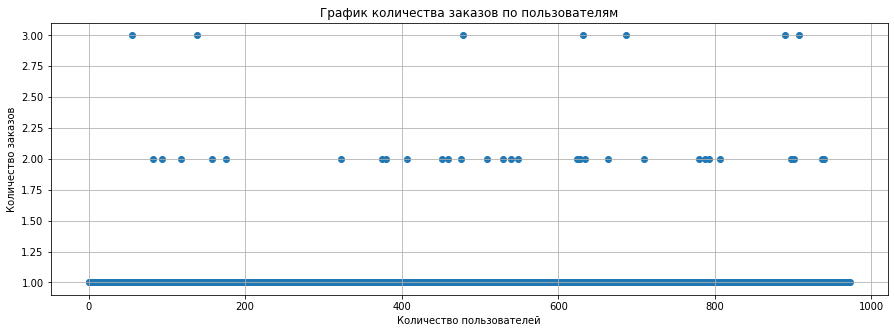

In [52]:
# строим точечный график количества заказов по пользователям
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям');

***Вывод:***<br><br>Доминирующее число пользователей совершали 1 заказ, пользователей с 2 заказами гораздо меньше. <br>Пользователей с 3 заказами - единицы.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. ###

In [53]:
print(np.percentile(ordersByUsers['transaction_id'], [95, 99]))

[1. 2.]


***Вывод:***<br><br>Не более *5 %* пользователей совершали больше одного заказа. Не более *1 %* больше 2. Все что за 99 перцентилем будем считать аномальным

### Построим точечный график стоимостей заказов. ###

In [54]:
# серия из чисел от 0 до количества наблюдений в orders['revenue']
x_values = pd.Series(range(0, len(orders['revenue'])))

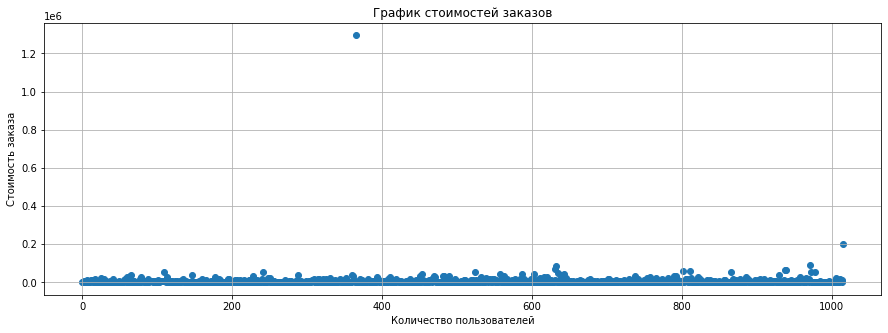

In [55]:
# строим график стоимостей заказов
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов');

***Вывод:***<br><br>График не информативен по причине наличия 2 аномальных значений. <br>Возможно это именно те заказы, которые вызвали скачки на предыдущих графиках суммы и среднего чека. <br> Изучим данный вопрос более детально.

In [56]:
# посмотрим суммы аномальных заказов
orders['revenue'].sort_values(ascending=False)

425     1294500
1196     202740
1136      92550
744       86620
743       67990
         ...   
404          70
933          60
584          50
756          50
459          50
Name: revenue, Length: 1016, dtype: int64

In [57]:
# отфильтруем данные от выбросов
orders_without_outliers = orders.query('revenue < 100000')

In [58]:
# серия из чисел от 0 до количества наблюдений в orders_without_outliers['revenue']
x_values = pd.Series(range(0, len(orders_without_outliers['revenue'])))

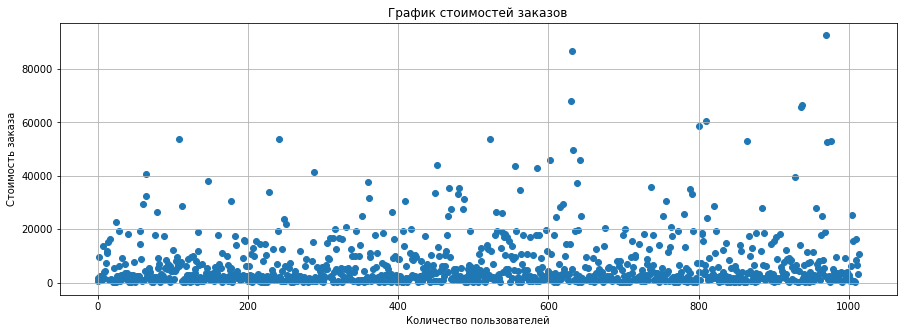

In [59]:
# строим график стоимостей заказов без выбросов
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(x_values, orders_without_outliers['revenue'])
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов');

***Вывод:***<br><br>У доминирующей части пользователей сумма заказа не превышает 20 тысяч рублей. Так же есть единичные заказы свыше 80 тысяч рублей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. ###

In [60]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


***Вывод:***<br><br>Не более, чем у *5 %* заказов сумма составляет 26 785 рублей. И не больше, чем у *1 %* заказов дороже 53 904 рублей. <br>Все что за пределам 99 перцентиля - аномально.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. ### 

In [61]:
# для начала, соберем все данные (визиты, заказы, кумулятивные показатели)
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [62]:
# объединим все в одну таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [63]:
# выведем результат 
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [64]:
# создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders'].
# в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

In [65]:
# объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

*Сформулируем 2 статистические гипотезы:*

- H0: Статистические значимые различия конверсий между группами А и B <b>отсутствуют</b>.
- Н1: Статистические значимые различия конверсий между группами А и B <b>присутствуют</b>.

In [66]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост группы B к А: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.011
Относительный прирост группы B к А: 0.160


***Вывод:***<br><br>P-value меньше *0.05*, в таком случае мы отвергаем нулевую гипотезу.<br>Делаем вывод, что по "сырым" данным , между группами <b>А</b> и <b>В</b> присутствуют значимые статистические различия конверсий.<br> Относительный прирост группы <b>B</b> к <b>А</b> равен *16 %*.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. ###

*Сформулируем 2 статистические гипотезы:*

- H0: Статистические значимые различия в среднем чеке заказа между группами А и B <b>отсутствуют</b>.
- Н1: Статистические значимые различия в среднем чеке заказа между группами А и B <b>присутствуют</b>.

In [67]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель группы B к А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительный показатель группы B к А: 0.287


***Вывод:***<br><br>P-value больше *0.05*, в таком случае мы принимаем нулевую гипотезу. <br>Делаем вывод, что по "сырым" данным, статистические значимые различия в среднем чеке заказа между группами <b>А</b> и <b>В</b> отсутствуют.<br> Наблюдаемое различие в среднем чеке заказа между группами <b>А</b> и <b>В</b> в *29 %* не являются статистически значимыми.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. ###

In [68]:
# cделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders 
# и пользователей, совершивших заказы дороже 53904 — usersWithExpensiveOrders. 
# объединим их в таблице abnormalUsers
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [69]:
# посчитаем количество аномальных пользователей
print(len(abnormalUsers))

16


In [70]:
# создадим срезы для каждой группы с очищенными данными, не включая аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

*Сформулируем 2 статистические гипотезы:*

- H0: Статистические значимые различия конверсий между группами А и B <b>отсутствуют</b>.
- Н1: Статистические значимые различия конверсий между группами А и B <b>присутствуют</b>.

In [71]:
# применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель группы B к А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.007
Относительный показатель группы B к А: 0.189


 ***Вывод:***<br><br>P-value меньше *0.05*, в таком случае мы отвергаем нулевую гипотезу. <br>Делаем вывод, что по "очищенным" данным, между группами <b>А</b> и <b>В</b> присутствуют значимые статистические различия конверсий.<br>Относительный прирост группы <b>B</b> к <b>А</b> равен *19 %*, что выше на *3 %*,чем по сырым данным (*16 %*)



### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. ###

*Сформулируем 2 статистические гипотезы:*

- H0: Статистические значимые различия в среднем чеке заказа между группами А и B <b>отсутствуют</b>.
- Н1: Статистические значимые различия в среднем чеке заказа между группами А и B <b>присутствуют</b>.

In [72]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительный показатель группы B к А: {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.788
Относительный показатель группы B к А: -0.032


***Вывод:***<br><br>P-value больше *0.05*, в таком случае мы принимаем нулевую гипотезу. <br>Делаем вывод, что по "очищенным" данным, статистические значимые различия в среднем чеке заказа между группами <b>А</b> и <b>В</b> отсутствуют.<br> Средний чек группы <b>B</b> по очищенным данным оказался чуть ниже (*-3%*) по отношению к среднему чеку группы <b>А</b>, в отличии от показателя аналогичных параметров по 'сырым' данным.(Средний чек заказа группы <b>B</b> выше среднего чека группы <b>А</b> приблизительно на *29 %*.) <br>Аномальные заказы оказывали существенное влияние на общую картину.

### Принимаем решение по результатам теста ###

**Общий вывод:**<br><br>При расчете RICE, из 9 гипотез, наибольший приоритет получила <b>8</b> гипотеза - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.<br><br>
На графике кумулятивной выручки по группам, выручка группы <b>B</b> выше выручки группы <b>А</b> на протяжении всего заданного периода анализа. Так же наблюдается резкий скачок группы <b>B</b> в промежутке с *2019-08-18 - 2019-08-19*.<br><br>
На графике кумулятивного среднего чека по группам, средний чек группы <b>B</b> уже не так стабилен, наблюдаются просадка показателей по отношению к группе <b>А</b> на период *2019-08-11 - 2019-08-15*. Далее показатель <b>B</b> испытывает резкий прирост в промежутке с *2019-08-18 - 2019-08-19*. И затем оба показателя идут параллельно.<br><br>
Показатель относительного изменения кумулятивного среднего чека группы <b>B</b> испытывает рост до *2019-08-05*, далее резкий спад до *2019-08-13* и последующий рост до *2019-08-20* с плавным падением не ниже нулевого уровня.<br><br>
Средний чек группы <b>B</b> выше, чем у группы <b>А</b>.
В первых числах показатель кумулятивного среднего количества заказов на посетителя у группы <b>A</b> имел стремительный, пиковый рост и столь же стремительное падение.
Далее на протяжении всего отрезка анализа, показатель группы <b>А</b> стабильно ниже, чем показатель группы <b>B</b>.<br><br> 
Показатель относительного изменения кумулятивного среднего количества заказов на посетителя группы <b>B</b>  лидирует по отношению к показателю группы <b>A</b> на протяжении всего периода анализа.
Тенденция стабильно сохраняется на уровне *14 - 16 %*. На *2019-08-14* по *2019-08-17* приходился пик, который доходил до *20 %*.<br><br>
Доминирующее число пользователей совершали 1 заказ в обоих группах, пользователей с 2 заказами гораздо меньше. Пользователи с 3 заказами – крайняя редкость.
У доминирующей части пользователей сумма заказа не превышает 20 тысяч рублей. Так же есть единичные заказы свыше 80 тысяч рублей. Обнаружены  2 аномально больших заказа 1 294 500 рублей, 202 740 рублей которые и являются причиной скачка кумулятивного среднего чека группы <b>B</b>.<br><br>
При проведении тестов на  статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным с использованием критерия Манна-Уитни , нулевая гипотеза была отвергнута. Делаем вывод, что по «сырым» данным , между группами <b>А</b> и <b>В</b> присутствуют значимые статистические различия конверсий. Относительный прирост группы <b>B</b> к <b>А</b> равен *16 %*.<br>
При проведении аналогичного теста , но уже с очищенными данными, нулевая гипотеза была отвергнута. Делаем вывод, что по «очищенным» данным, между группами <b>А</b> и <b>В</b> присутствуют значимые статистические различия конверсий.
Относительный прирост группы <b>B</b> к <b>А</b> равен *19 %*, что выше на *3 %*,чем по сырым данным (*16 %*).<br><br>
При проведении тестов на статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, нулевая гипотеза была принята. Делаем вывод, что по «сырым» данным, статистические значимые различия в среднем чеке заказа между группами <b>А</b> и <b>В</b> отсутствуют.
Наблюдаемое различие в среднем чеке заказа между группами <b>А</b> и <b>В</b> в *29 %* не являются статистически значимыми.
При проведении аналогичного теста , но уже с очищенными данными, нулевая гипотеза была отвергнута. Делаем вывод, что по «очищенным» данным, статистические значимые различия в среднем чеке заказа между группами <b>А</b> и <b>В</b> отсутствуют.
Средний чек группы <b>B</b> по очищенным данным оказался чуть ниже (*-3%*) по отношению к среднему чеку группы <b>А</b>, в отличии от показателя аналогичных параметров по 'сырым' данным. (Средний чек группы <b>B</b> выше, чем у группы <b>А</b> на *29 %*.)<br><br>
Аномальные заказы оказывали существенное влияние на общую картину.


**Варианты решений:**
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Предлагаю остановить тест, зафиксировать отсутствие различий между группами по сумме среднего чека, а так же победу группы <b>B</b> по причине того, что показатель конверсии выше, чем у группы <b>А</b> по «сырым»(*16 %*)  и «очищенным»(*19 %*) данным. Необходимо продумать стратегию по увеличению среднего чека. <br><br>Рекомендую добавить такие опции:
- бесплатная доставка (или скидка) от опреденной потраченной суммы 
- растущая скидка от количества покупаемых товаров
- рекомендуемые дополнительные товары в корзине или при оплате
- программа лояльности (скидочные или накопительные карты постоянного покупателя)